In [1]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df1.columns

Index(['고객번호', '증감확인', '성별', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급',
       '식료품_NET', '식료품_ABS', '의류_NET', '의류_ABS', '생활_NET', '생활_ABS', '화장품_NET',
       '화장품_ABS', '기호품_NET', '기호품_ABS', '휴일_CV_S', '편의품_CV_S', '선매품CV_S',
       '전문품CV_S', '기타CV_S', '매출증감지수', '객단가증감률', 'A_구매금액', 'B_구매금액', 'C_구매금액',
       'D_구매금액'],
      dtype='object')

In [17]:
df1 = pd.read_csv('1-8기최종.csv', encoding="cp949",index_col=0)
df1

,고객번호,증감확인,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,식료품_NET,식료품_ABS,...,편의품_CV_S,선매품CV_S,전문품CV_S,기타CV_S,매출증감지수,객단가증감률,A_구매금액,B_구매금액,C_구매금액,D_구매금액
0,1,0,2.156039,1.998229,3.784157,-0.652472,-0.424659,1.4,0,4,...,0.206334,-0.790094,0.267363,-0.849117,-1.388013,-0.670022,0.929296,-0.248486,-0.120202,-0.127978
1,2,0,2.156039,1.998229,1.828781,-0.652472,-0.424659,1.9,0,2,...,0.129422,-0.835259,0.948328,0.225322,-0.690965,-0.670022,1.229972,-0.274863,-0.193895,0.715572
2,3,0,2.156039,1.998229,-0.405935,-0.652472,-0.424659,2.3,0,0,...,-0.079951,2.588805,-0.976372,-1.599918,-1.620363,0.000107,-0.443446,-0.284499,0.040243,-0.127978
3,4,0,-0.463814,1.998229,0.432083,-0.652472,-0.424659,3.0,0,4,...,-0.449221,-0.516154,1.449001,-0.660012,0.703133,-0.670022,-0.203454,-0.206219,-0.132425,-0.127978
4,6,1,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,2.5,2,8,...,-0.158058,-1.144311,0.199393,-1.238202,-1.155664,-1.340151,-0.186322,0.131975,-0.155648,-0.127978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,3.0,0,4,...,0.660101,1.414476,-0.976372,-0.718081,-1.155664,-0.670022,-0.400862,-0.233634,-0.191939,3.564123
18862,19334,0,2.156039,-1.108456,7.974248,1.068660,-0.424659,1.6,-1,5,...,1.414923,0.745889,-0.976372,0.075304,0.935482,-2.010280,-0.437690,0.258621,-0.134567,-0.127978
18863,19335,1,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,2.8,1,5,...,-0.371639,-0.424077,-0.976372,0.292020,1.167832,0.670236,-0.423405,0.389109,-0.070952,-0.127978
18864,19336,1,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,1.9,0,0,...,3.101738,-0.421960,0.305254,-0.728735,0.703133,-0.670022,0.061776,-0.283601,-0.193895,0.039023


In [7]:
df1 = pd.read_csv('찐막18기데이터셋_원본.csv', encoding="cp949")
df1

,고객번호,증감확인,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,식료품_NET,식료품_ABS,...,화장품_ABS,기호품_NET,기호품_ABS,휴일_CV_S,편의품_CV_S,선매품CV_S,전문품CV_S,기타CV_S,매출증감지수,객단가증감률
0,1,0,1,5,15,0,0,1.4,0,4,...,4,-3,5,0.534529,0.423231,0.415863,1.356745,0.491980,1.0,5
1,2,0,1,5,8,0,0,1.9,0,2,...,0,1,7,0.403153,0.404963,0.395417,2.099585,1.196030,0.8,7
2,3,0,1,5,0,0,0,2.3,0,0,...,0,-1,3,0.668476,0.355232,1.945495,0.000000,0.000000,0.0,0
3,4,0,0,5,3,0,0,3.0,0,4,...,10,1,7,0.619182,0.267522,0.539876,2.645751,0.615895,0.4,5
4,6,1,0,5,0,0,0,2.5,2,8,...,2,0,4,0.534952,0.336680,0.255509,1.282600,0.237022,-1.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,0,1,0,1,5,3.0,0,4,...,0,-1,3,0.375562,0.531012,1.413875,0.000000,0.577843,0.4,7
18862,19334,0,1,2,30,1,0,1.6,-1,5,...,6,-1,11,0.574768,0.710300,1.111205,0.000000,1.097728,3.0,9
18863,19335,1,0,2,0,1,0,2.8,1,5,...,8,1,3,0.472426,0.285949,0.581560,0.000000,1.239736,0.8,5
18864,19336,1,0,2,0,0,0,1.9,0,0,...,5,0,10,0.478711,1.110957,0.582518,1.398080,0.570862,-4.4,5


<AxesSubplot:>

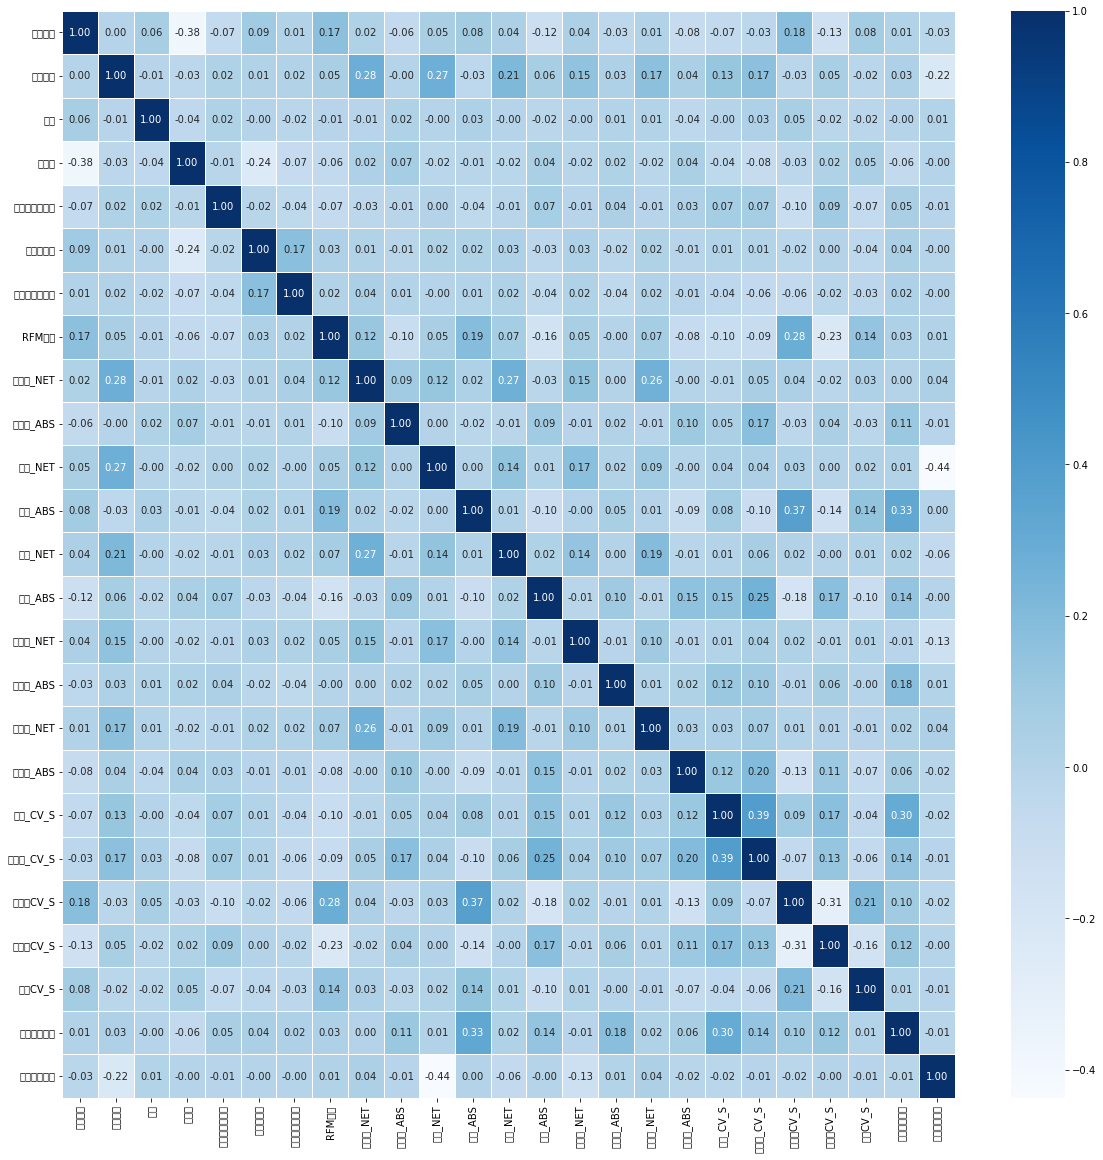

In [3]:
plt.figure(figsize=(20,20))
sns.heatmap(data =df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [8]:


X=df1.drop(['고객번호','증감확인'],axis=1)

y=df1[['증감확인']]

scaler = StandardScaler()

for i in X.columns:
    X[[f'{i}']]=scaler.fit_transform(X[[f'{i}']])

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=3)


X

,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,식료품_NET,식료품_ABS,의류_NET,의류_ABS,...,화장품_ABS,기호품_NET,기호품_ABS,휴일_CV_S,편의품_CV_S,선매품CV_S,전문품CV_S,기타CV_S,매출증감지수,객단가증감률
0,2.156039,1.998229,3.784157,-0.652472,-0.424659,-1.754621,-0.378043,0.367476,-0.005168,-1.473442,...,-0.173192,-2.364188,0.078276,-0.127148,0.206334,-0.790094,0.267363,-0.849117,-0.196766,0.075893
1,2.156039,1.998229,1.828781,-0.652472,-0.424659,-0.822823,-0.378043,-0.476547,1.000053,-1.033802,...,-1.374564,0.572475,0.793588,-0.581635,0.129422,-0.835259,0.948328,0.225322,-0.296454,0.705120
2,2.156039,1.998229,-0.405935,-0.652472,-0.424659,-0.077385,-0.378043,-1.320570,-0.005168,-0.594163,...,-1.374564,-0.895856,-0.637036,0.336230,-0.079951,2.588805,-0.976372,-1.599918,-0.695207,-1.497173
3,-0.463814,1.998229,0.432083,-0.652472,-0.424659,1.227132,-0.378043,0.367476,-0.005168,-0.594163,...,1.628867,0.572475,0.793588,0.165701,-0.449221,-0.516154,1.449001,-0.660012,-0.495831,0.075893
4,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,0.295334,1.485112,2.055523,1.000053,-0.154524,...,-0.773878,-0.161691,-0.279380,-0.125685,-0.158058,-1.144311,0.199393,-1.238202,-1.293337,-0.238720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,1.227132,-0.378043,0.367476,-1.010390,-1.033802,...,-1.374564,-0.895856,-0.637036,-0.677083,0.660101,1.414476,-0.976372,-0.718081,-0.495831,0.705120
18862,2.156039,-1.108456,7.974248,1.068660,-0.424659,-1.381902,-1.309620,0.789488,1.000053,-0.154524,...,0.427495,-0.895856,2.224212,0.012055,1.414923,0.745889,-0.976372,0.075304,0.800116,1.334347
18863,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,0.854413,0.553534,0.789488,-1.010390,-0.154524,...,1.028181,0.572475,-0.637036,-0.341990,-0.371639,-0.424077,-0.976372,0.292020,-0.296454,0.075893
18864,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,-0.822823,-0.378043,-1.320570,2.005275,0.285115,...,0.127151,-0.161691,1.866556,-0.320248,3.101738,-0.421960,0.305254,-0.728735,-2.888348,0.075893


In [179]:
# rf_clf = RandomForestClassifier(n_jobs=-1)
# rf_clf.fit(X_train,y_train)
# print(round(accuracy_score(y_test,rf_clf.predict(X_test)),3))


# # # pred = rf_clf.predict(X_tr)
# # # accuracy = accuracy_score(y_test,pred)
# # # accuracy




# # # params = {
# # #     'n_estimators':[50,100],
# # #     'max_depth' : [6,8,10,12],
# # #    'min_samples_leaf' : [8,12,18],
# # #     'min_samples_split' : [8,14,20]
# # # }
# # # grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
# # # grid_cv.fit(X_train,y_train)


# # # print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# # # print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


In [180]:
lst=[]
for i in range(1000):
    rf_clf = RandomForestClassifier(n_jobs=-1,random_state=i)
    rf_clf.fit(X_train,y_train)
    print(i,'번째',accuracy_score(y_test,rf_clf.predict(X_test)))
    aa=accuracy_score(y_test,rf_clf.predict(X_test))
    lst.append(aa)

0 번째 0.7072072072072072
1 번째 0.7125066242713302
2 번째 0.7066772655007949
3 번째 0.7130365659777425
4 번째 0.708532061473238
5 번째 0.708532061473238
6 번째 0.7040275569687334
7 번째 0.7095919448860626
8 번째 0.7093269740328564
9 번째 0.7080021197668257
10 번째 0.7045574986751457
11 번째 0.7106518282988871
12 번째 0.7095919448860626
13 번째 0.7095919448860626
14 번째 0.7156862745098039
15 번째 0.7095919448860626
16 번째 0.7111817700052994


KeyboardInterrupt: 

In [9]:

def est(y_test,pred,pred_proba):
    con=confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    rec=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc=roc_auc_score(y_test,pred_proba)
    print('오차행렬\n',con.round(3))
    print('정확도 :',acc.round(3))
    print('정밀도 :',pre.round(3))
    print('재현율 :',rec.round(3))
    print('f1점수:',f1.round(3))
    print('roc_auc :',roc.round(3))
    print()
    print()
    
    
    
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:,1]
print('결정트리')
est(y_test,pred,pred_proba)
 
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)[:,1]
print('랜덤포레스트')
est(y_test,pred,pred_proba)

                                                                  
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
print('로지스틱회귀')
est(y_test,pred,pred_proba)

lgbm_wrapper = LGBMClassifier(n_estimators=100)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_set=evals, verbose=False)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
print('LGBM')
est(y_test,pred,pred_proba)


evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss', verbose=False)
pred = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
print('XGB')
est(y_test,pred,pred_proba)


결정트리
오차행렬
 [[1428  710]
 [ 669  967]]
정확도 : 0.635
정밀도 : 0.577
재현율 : 0.591
f1점수: 0.584
roc_auc : 0.629


랜덤포레스트
오차행렬
 [[1765  373]
 [ 678  958]]
정확도 : 0.722
정밀도 : 0.72
재현율 : 0.586
f1점수: 0.646
roc_auc : 0.787


로지스틱회귀
오차행렬
 [[1698  440]
 [ 636 1000]]
정확도 : 0.715
정밀도 : 0.694
재현율 : 0.611
f1점수: 0.65
roc_auc : 0.786


LGBM
오차행렬
 [[1734  404]
 [ 642  994]]
정확도 : 0.723
정밀도 : 0.711
재현율 : 0.608
f1점수: 0.655
roc_auc : 0.791


XGB
오차행렬
 [[1751  387]
 [ 643  993]]
정확도 : 0.727
정밀도 : 0.72
재현율 : 0.607
f1점수: 0.658
roc_auc : 0.794




In [10]:
len(rf_clf.feature_importances_)

23

Index(['성별', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급', '식료품_NET',
       '식료품_ABS', '의류_NET', '의류_ABS', '생활_NET', '생활_ABS', '화장품_NET', '화장품_ABS',
       '기호품_NET', '기호품_ABS', '휴일_CV_S', '편의품_CV_S', '선매품CV_S', '전문품CV_S',
       '기타CV_S', '매출증감지수', '객단가증감률'],
      dtype='object')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

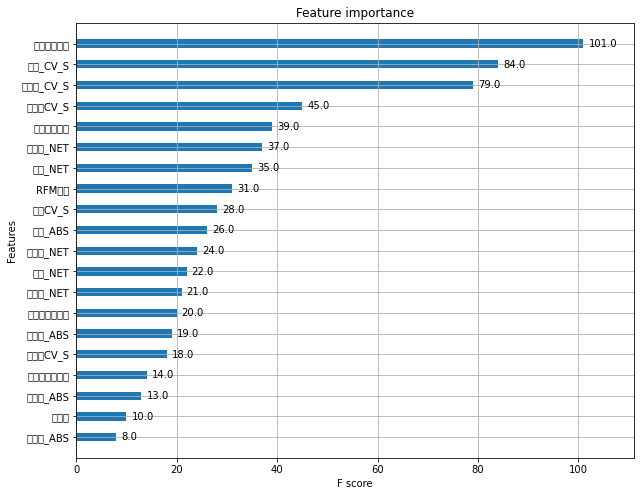

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_wrapper, ax=ax , max_num_features=20,height=0.4)

In [197]:
X[['경쟁사이용횟수', '식료품_NET',
     '의류_NET', '생활_NET', '생활_ABS', 
      '휴일_CV_S', '편의품_CV_S', '선매품CV_S',
       '객단가증감률']]

,경쟁사이용횟수,식료품_NET,의류_NET,생활_NET,생활_ABS,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률
0,3.784157,-0.378043,-0.005168,-3.330510,1.961265,-0.127148,0.206334,-0.790094,-0.670022
1,1.828781,-0.378043,1.000053,-0.232331,-0.955576,-0.581635,0.129422,-0.835259,-0.670022
2,-0.405935,-0.378043,-0.005168,-0.232331,-1.684786,0.336230,-0.079951,2.588805,0.000107
3,0.432083,-0.378043,-0.005168,-1.006875,0.138239,0.165701,-0.449221,-0.516154,-0.670022
4,-0.405935,1.485112,1.000053,0.542214,0.867449,-0.125685,-0.158058,-1.144311,-1.340151
...,...,...,...,...,...,...,...,...,...
18861,-0.405935,-0.378043,-1.010390,-1.006875,-1.320181,-0.677083,0.660101,1.414476,-0.670022
18862,7.974248,-1.309620,1.000053,-0.232331,0.502844,0.012055,1.414923,0.745889,-2.010280
18863,-0.405935,0.553534,-1.010390,0.542214,-0.590971,-0.341990,-0.371639,-0.424077,0.670236
18864,-0.405935,-0.378043,2.005275,2.091304,3.784290,-0.320248,3.101738,-0.421960,-0.670022


<AxesSubplot:>

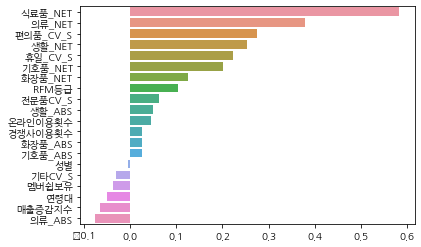

In [188]:
coef = pd.Series(lr_clf.coef_ [0], index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

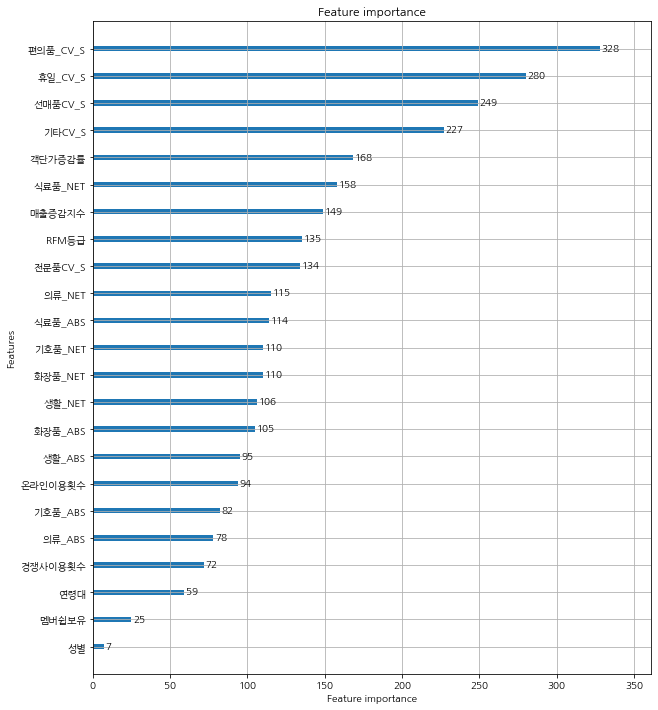

In [186]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

<AxesSubplot:>

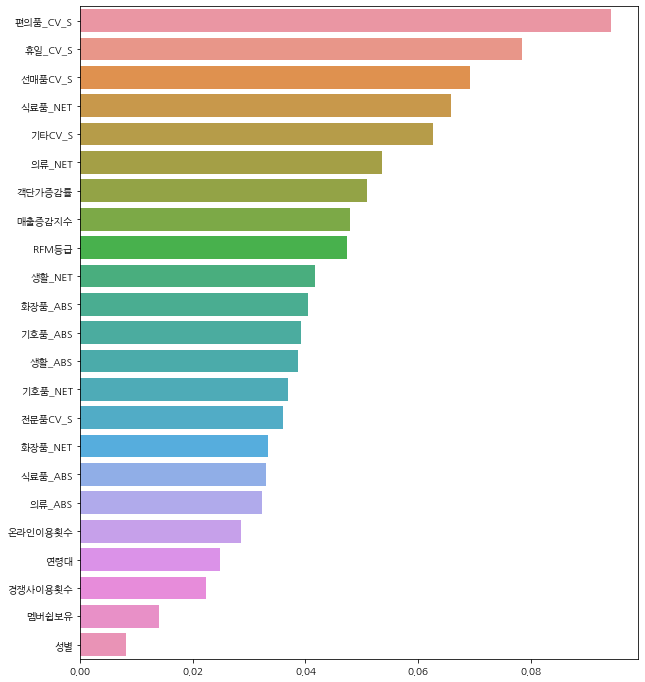

In [183]:
feature_series = pd.Series(data=rf_clf.feature_importances_, index=X.columns )
feature_series = feature_series.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 12))
sns.barplot(x= feature_series, y=feature_series.index)

In [15]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

Index(['성별', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급', '식료품_NET',
       '식료품_ABS', '의류_NET', '의류_ABS', '생활_NET', '생활_ABS', '화장품_NET', '화장품_ABS',
       '기호품_NET', '기호품_ABS', '휴일_CV_S', '편의품_CV_S', '선매품CV_S', '전문품CV_S',
       '기타CV_S', '매출증감지수', '객단가증감률'],
      dtype='object')

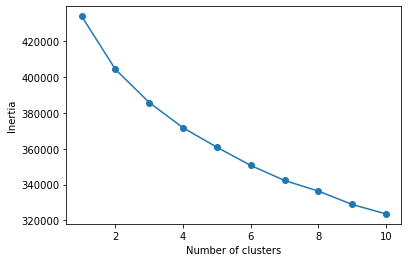

In [12]:
inertia = []
for i in range(1, 11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(X)
    inertia.append(kmeans_plus.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
for i in X.columns:
    X[f'{i}'] = np.log1p(X[f'{i}'])
X.fillna(0,inplace=True)
X

,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,식료품_NET,식료품_ABS,의류_NET,의류_ABS,...,화장품_ABS,기호품_NET,기호품_ABS,휴일_CV_S,편의품_CV_S,선매품CV_S,전문품CV_S,기타CV_S,매출증감지수,객단가증감률
0,1.149318,1.098022,1.565310,-1.056909,-0.552792,0.000000,-0.474884,0.312967,-0.005182,0.000000,...,-0.190182,0.000000,0.075364,-0.135990,0.187586,-1.561094,0.236939,-1.891250,-0.219109,0.073151
1,1.149318,1.098022,1.039846,-1.056909,-0.552792,-1.730606,-0.474884,-0.647308,0.693174,0.000000,...,0.000000,0.452651,0.584218,-0.871402,0.121706,-1.803379,0.666972,0.203203,-0.351623,0.533636
2,1.149318,1.098022,-0.520767,-1.056909,-0.552792,-0.080543,-0.474884,0.000000,-0.005182,-0.901804,...,0.000000,-2.261984,-1.013451,0.289852,-0.083328,1.277819,-3.745315,0.000000,-1.188123,0.000000
3,-0.623273,1.098022,0.359130,-1.056909,-0.552792,0.800715,-0.474884,0.312967,-0.005182,-0.901804,...,0.966553,0.452651,0.584218,0.153322,-0.596421,-0.725989,0.895680,-1.078845,-0.684843,0.073151
4,-0.623273,1.098022,-0.520767,-1.056909,-0.552792,0.258769,0.910318,1.116951,0.693174,-0.167855,...,-1.486679,-0.176368,-0.327643,-0.134314,-0.172044,0.000000,0.181816,0.000000,0.000000,-0.272754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,-0.623273,0.000000,-0.520767,0.726901,-0.088780,0.800715,-0.474884,0.312967,0.000000,0.000000,...,0.000000,-2.261984,-1.013451,-1.130359,0.506878,0.881482,-3.745315,-1.266137,-0.684843,0.533636
18862,1.149318,0.000000,2.194359,0.726901,-0.552792,0.000000,0.000000,0.581929,0.693174,-0.167855,...,0.355921,-2.261984,1.170689,0.011982,0.881668,0.557264,-3.745315,0.072604,0.587851,0.847732
18863,-0.623273,0.000000,-0.520767,0.726901,-0.552792,0.617568,0.440533,0.581929,0.000000,-0.167855,...,0.707139,0.452651,-1.013451,-0.418535,-0.464641,-0.551781,-3.745315,0.256207,-0.351623,0.073151
18864,-0.623273,0.000000,-0.520767,-1.056909,-0.552792,-1.730606,-0.474884,0.000000,1.100369,0.250848,...,0.119694,-0.176368,1.053111,-0.386027,1.411411,-0.548112,0.266398,-1.304660,0.000000,0.073151


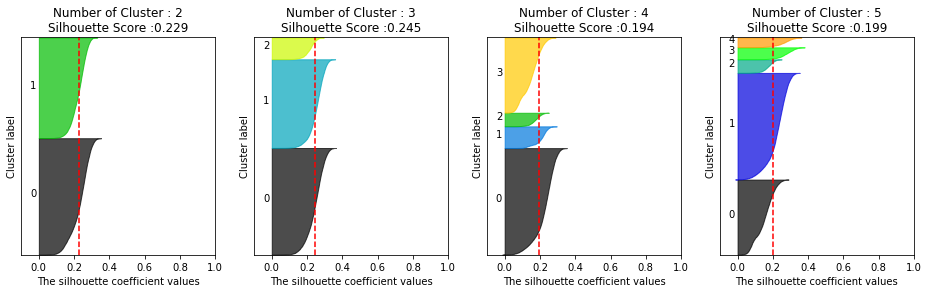

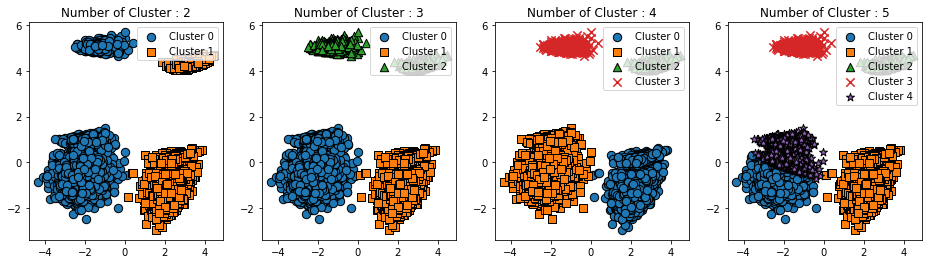

In [16]:
visualize_silhouette([2,3,4,5], X)
visualize_kmeans_plot_multi([2,3,4,5],X)